In [ ]:
# simply compare the stdev distribution between different experiments
# initial built: 05/09/2024

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [15]:
instrument = 'amsua'
channel    = 'ch1'
stdev_from = 'OmF'
expids     = ['CTRL','CTRL_no_situ','ng_v0','ng_all_infla']

In [16]:
dfs={}
for exp in expids:
    print(f'processing {exp}...')
    if exp == 'create_table':
        fn = f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/compile_radstats/csv_files/default_used_to_build_pdfs/omf_stats_{instrument}_{channel}.csv'
    else:
        fn = f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/compile_radstats/csv_files/{exp}/omf_stats_{instrument}_{channel}.csv'
    df=pd.read_csv(fn)
    # screen the data:
    dfs[exp] = df[(abs(df['omf_ges']) < 1e3)&(df['fwater']>=0.99)]

processing CTRL...
processing CTRL_no_situ...
processing ng_v0...
processing ng_all_infla...


In [ ]:
with open(f'/home/Chih-Chi.Hu/python_codes/tables/pkl_files/saved_nginfo_{instrument}_{channel}_create_table.pkl', 'rb') as f:
    nginfo = pickle.load(f)

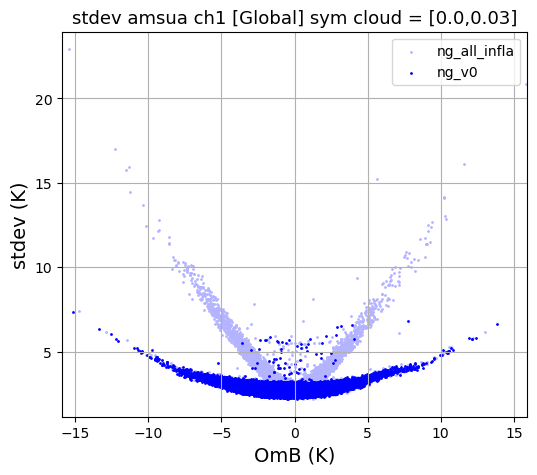

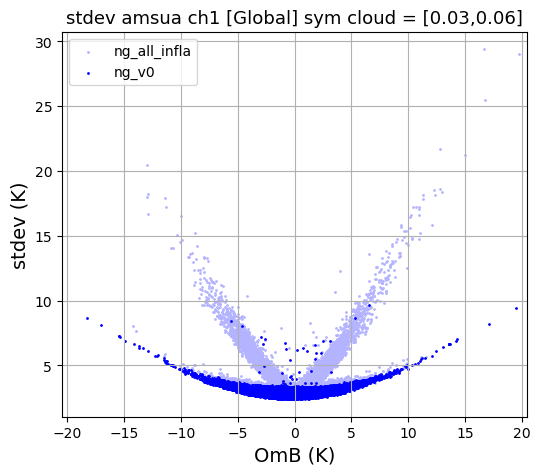

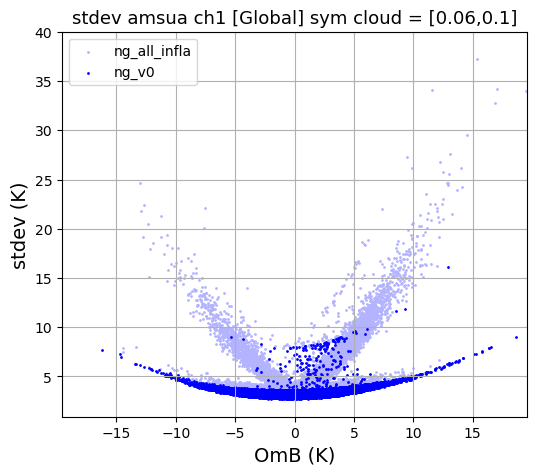

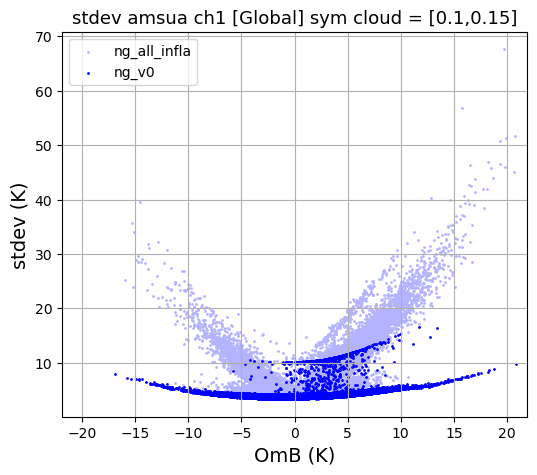

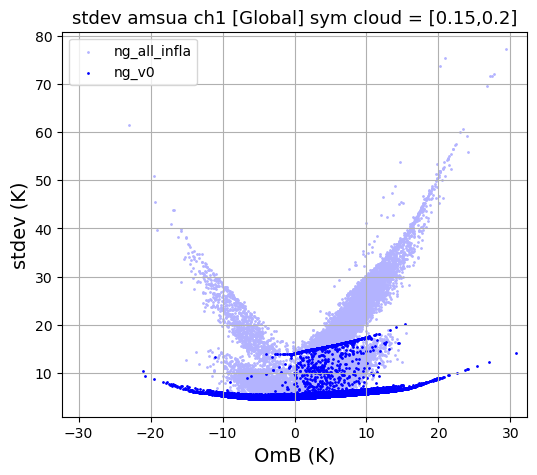

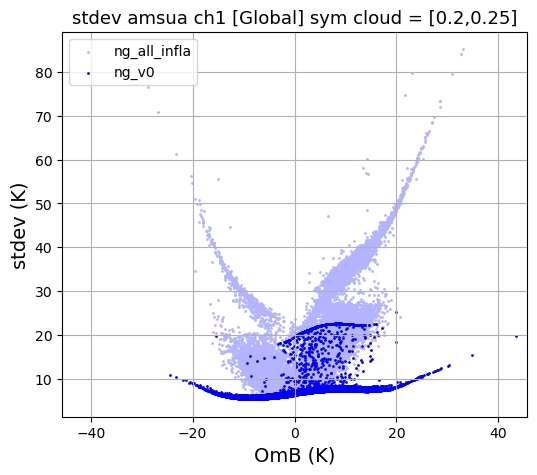

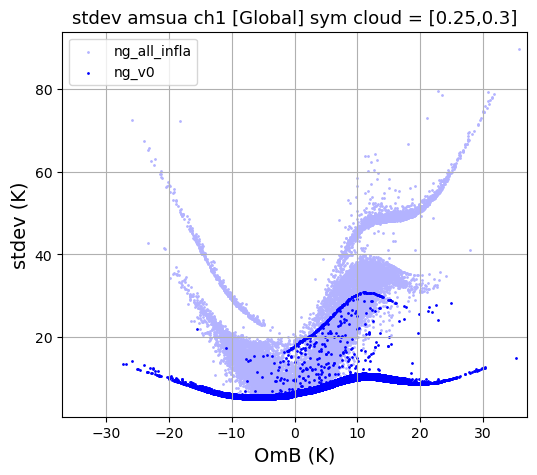

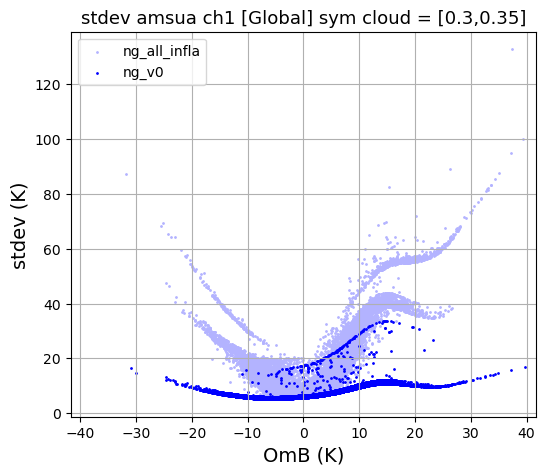

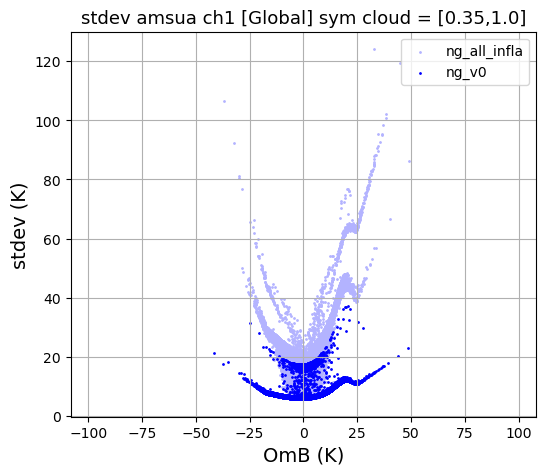

In [32]:
# compare the symmetric Gaussian error/non-Gaussian error/ SDOEI
colors={'CTRL':        (1.0,0.7,0.7), \
        'CTRL_no_situ':(1.0,0.0,0.0), \
        'ng_v0':       (0.0,0.0,1.0), \
        'ng_all_infla':(0.7,0.7,1.0)}
#exp_compare = ['CTRL', 'CTRL_no_situ'] # tips: put the exp with larger error first
exp_compare = ['ng_all_infla', 'ng_v0']
#exp_compare = ['CTRL_no_situ', 'ng_v0']
#exp_compare = ['CTRL', 'ng_all_infla']

import random
# create the dataframe for a selected range of symmetric cloud amount:
for i in range(len(nginfo)):
    fig, ax = plt.subplots(figsize=(6,5))
    
    for exp in exp_compare: 
        tmpdf = dfs[exp]
        select_cloud_df = tmpdf.loc[ ( 0.5*(tmpdf['clw_obs'] + tmpdf['clw_bg_ges']) >= nginfo[i]['cloud_edge'][0] )& \
                                     ( 0.5*(tmpdf['clw_obs'] + tmpdf['clw_bg_ges']) <  nginfo[i]['cloud_edge'][1] )] 
        
        n_data   = len(select_cloud_df)
        plot_data = random.sample(range(1, n_data), min(30000,n_data-1))
        ax.scatter(select_cloud_df['omf_ges'].iloc[plot_data], 1/select_cloud_df['errinv_ges'].iloc[plot_data], s=1, \
                   color=colors[exp], label=f'{exp}')
        
    #ax.set_ylim(0, 7*max(select_cloud_df['symerr_ges'].iloc[plot_data]))
    plt_xrange = 1.05*max(np.abs(select_cloud_df['omf_ges'].iloc[plot_data]))
    ax.set_xlim(-plt_xrange, plt_xrange)
    ax.set_xlabel('OmB (K)',fontsize=14)
    ax.set_ylabel('stdev (K)',fontsize=14)
    ax.legend(loc='best')
    ax.grid(True)
    sym_cloud_low  = nginfo[i]['cloud_edge'][0] 
    sym_cloud_high = nginfo[i]['cloud_edge'][1]
    ax.set_title(f'stdev {instrument} {channel} [Global] sym cloud = [{sym_cloud_low},{sym_cloud_high}]',fontsize=13)
    
    plt.savefig(f'final_stdev_compare_{instrument}_{channel}_{exp_compare[0]}-{exp_compare[1]}_cloud_{sym_cloud_low}_{sym_cloud_high}.png', dpi=200, bbox_inches='tight')